# Analysis3 - Decoder-ProbeEvaluation_DPR-TEST

    - Probe evalutaion at blocksize
    - /scratch/philhoon-relevance/decoder-classification/results/NQ-DEV-DPR/5-fold/1/decoder-seq-classifier-layer12-batch128-lr6e-4-combdata-blocksize20

In [41]:
from cycler import cycler
import numpy as np
import seaborn as sns
import matplotlib as mpl
import pathlib
from pprint import pprint
import pandas as pd
import matplotlib.pyplot as plt
import os
from rich.console import Console
from rich.table import Table
from util import utils
import re
from pathlib import Path

In [42]:
raw_light_palette = [
    (0, 122, 255), # Blue
    (255, 149, 0), # Orange
    (52, 199, 89), # Green
    (255, 59, 48), # Red
    (175, 82, 222),# Purple
    (255, 45, 85), # Pink
    (88, 86, 214), # Indigo
    (90, 200, 250),# Teal
    (255, 204, 0)  # Yellow
]

raw_gray_light_palette = [
    (142, 142, 147),# Gray
    (174, 174, 178),# Gray (2)
    (199, 199, 204),# Gray (3)
    (209, 209, 214),# Gray (4)
    (229, 229, 234),# Gray (5)
    (242, 242, 247),# Gray (6)
]


light_palette = np.array(raw_light_palette)/255
gray_light_palette = np.array(raw_gray_light_palette)/255

Light mode palette


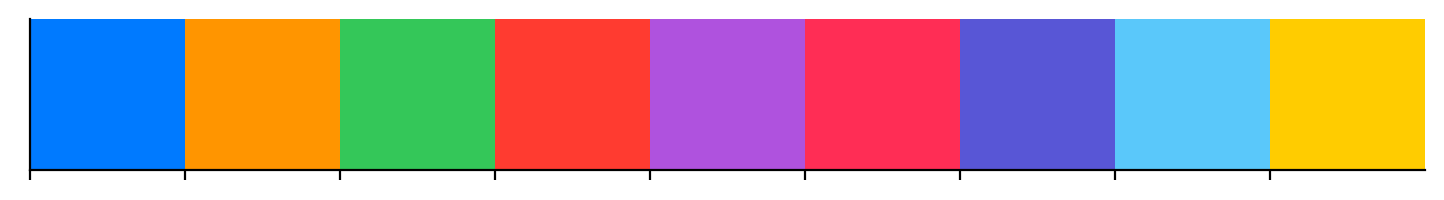

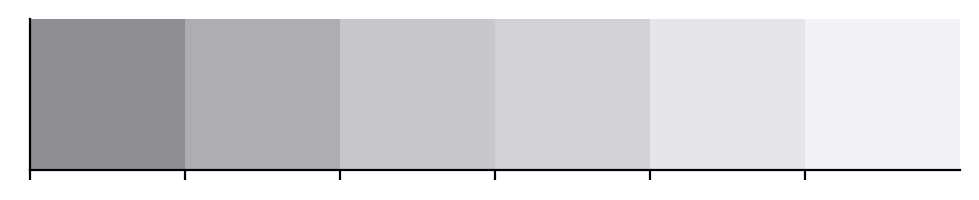

In [43]:
print('Light mode palette')
sns.palplot(light_palette)
sns.palplot(gray_light_palette)

In [44]:
# cmap 수정
mpl.rcParams['axes.prop_cycle'] = cycler('color',light_palette)
# 해상도 조정
mpl.rcParams['figure.dpi'] = 200
# ax의 우측과 상단 지우기
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.spines.right'] = False

In [45]:
model_path = '/scratch/philhoon-relevance/decoder-classification/results/NQ-DEV-DPR/5-fold/1/decoder-seq-classifier-layer24-batch32Xgr4-lr6e-5-combdata-blocksize60'

In [46]:
model_args_path=os.path.join(model_path, 'model_args.json')
model_args = utils.open_json(model_args_path)

In [47]:
block_size = model_args['block_size']

In [48]:
block_size

60

## Find all the probes given model path 

In [49]:
path_m = Path(model_path)

In [50]:
prob_path_lst = path_m.rglob('*Probes')

In [51]:
cnt = 0
comp_lst = []
for probe_path in prob_path_lst:
    comp_prob = probe_path.rglob('*inferencefinished.txt*')
    for comp in comp_prob:
        cnt += 1
        file_path = comp.parent / 'run.log'
        comp_lst.append(file_path)

In [52]:
print(cnt)

10


In [53]:
layer_pattern = r"layer(\d+)"
batch_pattern = r"batch(\d+)"
lr_pattern = r"lr([\d.e-]+)"
blocksize_pattern = r"blocksize(\d+)"
step_pattern = r"step_(\d+)"
probe_pattern = r"probe(\d+)"

In [54]:
result = []
for run_log in comp_lst:
    temp = {}
    run_logs_str = str(run_log)
#     print(run_logs_str)
    
    layer_match = re.search(layer_pattern, run_logs_str)
    batch_match = re.search(batch_pattern, run_logs_str)
    lr_match = re.search(lr_pattern, run_logs_str)
    blocksize_match = re.search(blocksize_pattern, run_logs_str)
    step_match = re.search(step_pattern, run_logs_str)
    probe_match = re.search(probe_pattern, run_logs_str)
    
    layer_num = int(layer_match.group(1)) if layer_match else None
    batch_num = int(batch_match.group(1)) if batch_match else None
    lr_num = lr_match.group(1) if lr_match else None
    blocksize_num = int(blocksize_match.group(1)) if blocksize_match else None
    step_num = int(step_match.group(1)) if step_match else None
    probe_num = int(probe_match.group(1)) if probe_match else None
    
    if lr_num and lr_num.endswith('-'):
        lr_num = lr_num[:-1]


#     print("layer:", layer_num)
    temp['layer'] = layer_num
#     print("batch:", batch_num)
    temp['batch'] = batch_num
#     print("lr:", lr_num)
    temp['lr'] = lr_num
#     print("blocksize:", blocksize_num)
    temp['blocksize'] = blocksize_num
#     print("step:", step_num)
    temp['step'] = step_num
#     print("probe:", probe_num)
    temp['probe'] = probe_num

    with open(run_log, "r") as f:
        lines = f.readlines()

        last_line = lines[-1]

        em_number_match = re.search(r"EM\s+(\d+\.\d+)", last_line)
        em_number = float(em_number_match.group(1)) if em_number_match else None
        temp['em_number'] = em_number
        # Print the extracted number
#         if em_number:
#             print("EM number:", em_number.group(1))
#         else:
#             print("No EM number found in the last line.")
#     pprint(temp)
    result.append(temp)

In [55]:
result_df = pd.DataFrame(result)

In [56]:
result_df

,layer,batch,lr,blocksize,step,probe,em_number
0,24,32,6e-5,60,450,3,53.88
1,24,32,6e-5,60,400,3,53.93
2,24,32,6e-5,60,50,3,51.27
3,24,32,6e-5,60,350,3,53.93
4,24,32,6e-5,60,500,3,54.04
5,24,32,6e-5,60,250,3,53.66
6,24,32,6e-5,60,200,3,53.88
7,24,32,6e-5,60,300,3,53.74
8,24,32,6e-5,60,150,3,53.49
9,24,32,6e-5,60,550,3,53.96


In [57]:
# print(result_df)

<AxesSubplot:xlabel='step', ylabel='em_number'>

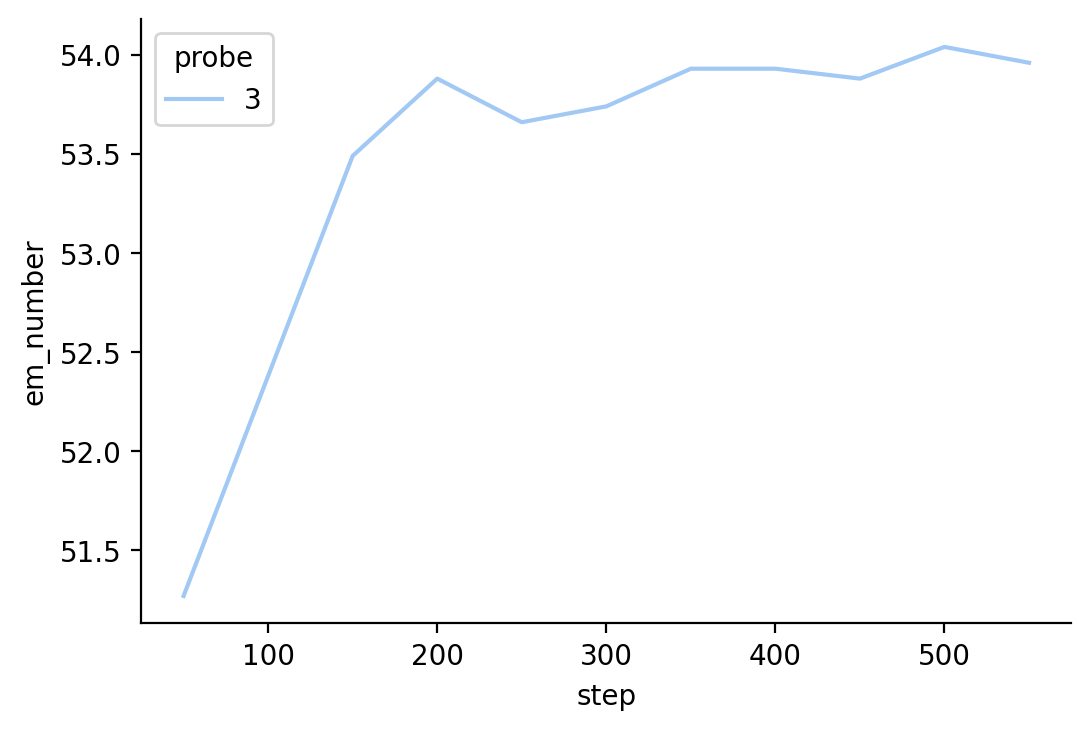

In [58]:
sns.lineplot(x='step', y='em_number', hue='probe', data=result_df, palette = 'pastel')
# graph.axhline(1.25)

In [59]:
# def get_plt_by_step_probe(result_df)
#     result_df_by_probe = result_df.groupby('probe')
#     fig, ax = plt.subplots(1, 1, figsize=(4, 4))
#     ax.plot(result_df_by_probe['step'],result_df_by_probe['em_number'], label='probe eval', alpha = 0.3, linewidth=5, color = 'blue', marker = "o")    
# ax.plot(df_incre['ctx'],df_incre['em'], label='dpr acc eval', alpha = 0.3, linewidth=5, color = 'red', marker = "*")
# # ax.set_title('FiD result on BM25 hard negative nq dev subsets')
# ax.set_title(title)
# ax.legend(title='Normal vs Accumulated', fontsize = 'x-small')
# plt.ylabel('EM')
# plt.xlabel('Number of Context')
# # plt.savefig(plot_path, dpi=300)
# plt.show()

In [60]:
sample_size = 100
output_file_path = f'/scratch/philhoon-relevance/FiD/results/NQ_DPR/TEST/incremental_result_100/ctx{sample_size}.json'

In [61]:
final_output = utils.open_json(output_file_path)

In [62]:
def extract_em_pattern(final_output, sample_size):
    em_pattern_lst = []
    for instance in final_output:
        em_pattern_lst.append(instance['em_pattern'][:sample_size])
    return em_pattern_lst

In [63]:
sample_size = 60
em_pattern_lst = extract_em_pattern(final_output, sample_size)

In [64]:
len(em_pattern_lst)

3610

In [65]:
def get_normal_em(em_pattern_lst, sample_size):
    cnt = 0
    for em in em_pattern_lst:
        if em[sample_size-1] == '1':
            cnt += 1
    print(cnt/len(em_pattern_lst))
    return cnt/len(em_pattern_lst)

In [66]:
normal_em = get_normal_em(em_pattern_lst, sample_size) * 100

0.5421052631578948


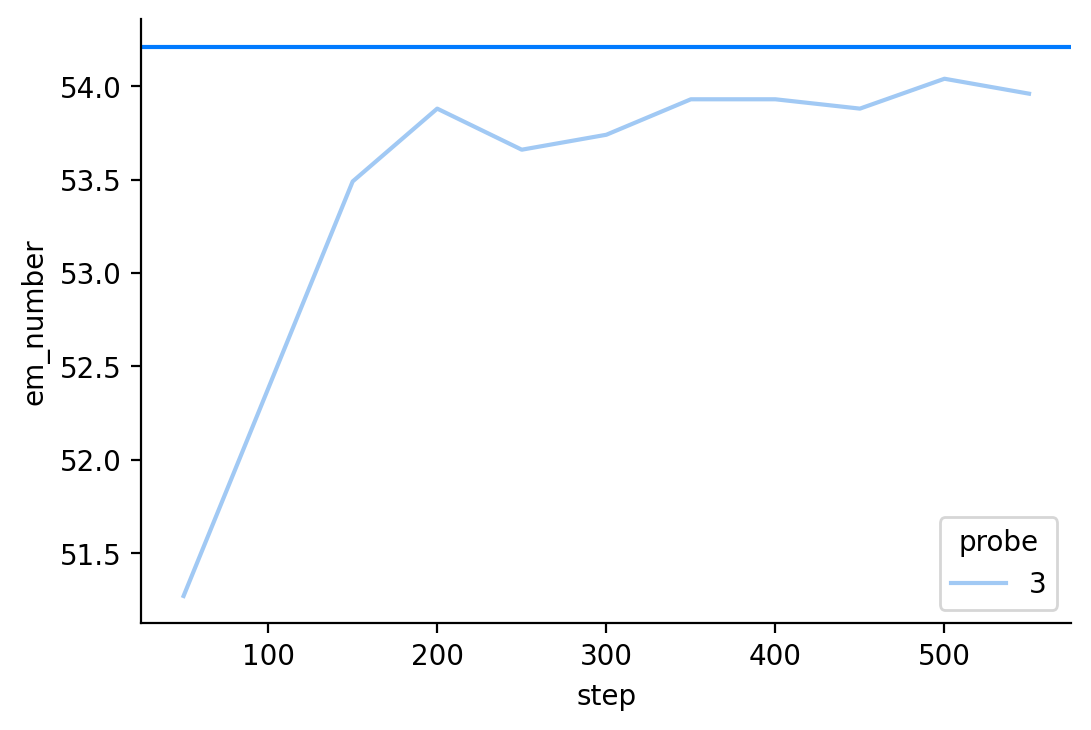

In [67]:
graph = sns.lineplot(x='step', y='em_number', hue='probe', data=result_df, palette = 'pastel')
graph.axhline(normal_em)

In [38]:
# em_pattnern_lst

In [42]:
def get_accumulated_em(em_pattnern_lst, sample_size):
    incre_em = {
        'ctx' : [],
        'em' : [],   
    }
    for ctx in range(1, sample_size+1):
        incre_em['ctx'].append(ctx)
        cnt = 0
        for pattern in em_pattnern_lst:
            if '1' in pattern[:ctx]:
                cnt += 1
        incre_em['em'].append(cnt/len(em_pattnern_lst))
    return incre_em

In [43]:
incre_em = get_accumulated_em(em_pattern_lst, sample_size)

In [49]:
incre_em['em'][sample_size-1]

0.6141274238227147